In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_pickle('../pickle_files/df1.p')

In [985]:
df.head()

,date,handle,id,language,tweet,tuples,tweets_clean,positive,negative,neutral,compound,United,Delta,Southwest,American
0,2017-11-04 03:23:36,eirbearrr,59fd32ff291ebbf619c97774,en,@united And the plane is sitting here they won...,"(help, one, is, sitting, here, us, the, wont, ...",and the plane is sitting here they wont let us...,0.118,0.096,0.786,0.1280,1.0,0.0,0.0,0.0
1,2017-11-04 03:23:34,arlohemphill,59fd32ff291ebbf619c97775,en,"@united Sure, DMing now","(dming, sure, now)",sure dming now,0.434,0.000,0.566,0.3182,1.0,0.0,0.0,0.0
2,2017-11-04 03:22:36,JDR1024,59fd32ff291ebbf619c97776,en,@united United should show the elite status of...,"(should, upgrade, of, list, united, show, the,...",united should show the elite status of passeng...,0.205,0.000,0.795,0.4753,1.0,0.0,0.0,0.0
3,2017-11-04 03:22:11,loooorenanicole,59fd32ff291ebbf619c97777,en,@united I'm SO DISAPPOINTED in your cust suppo...,"(support, in, shame, so, im, on, you, your, cu...",im so disappointed in your cust support shame ...,0.145,0.427,0.429,-0.7398,1.0,0.0,0.0,0.0
4,2017-11-04 03:20:36,loooorenanicole,59fd32ff291ebbf619c97779,en,"@united INCREDIBLY frustrated w/cust support, ...","(perks, frustrated, wcust, incredibly, explore...",incredibly frustrated wcust support im losing ...,0.214,0.252,0.534,-0.2830,1.0,0.0,1.0,0.0


#### Define positive and negative tweets by their compound score. Above +0.7 is a positive tweet, below -0.4 is a negative tweet. These threshholds gave me a good accuracy of actual positive and negative tweets. 

In [3]:
mask = df['compound'] <= -0.4
negative_rows = df.loc[mask] 
mask = df['compound'] >= 0.7
positive_rows = df.loc[mask]
mask = (df['compound'] > -0.4) & (df['compound'] < 0.7)
neutral_rows = df.loc[mask]

In [4]:
print(len(negative_rows))
print(len(positive_rows))

10515
6331


In [10]:
row = np.random.choice(negative_rows.index.values)
print(row)
print(negative_rows.loc[row, 'tweet'])
print(negative_rows.loc[row, 'compound'])

125340
@DogFaceSoldier @Delta And on this end, Delta Flt delayed &amp; missed connecting flt. Bonus is  morning chaos in ATL airport. Not a good sign when food is at gate..
-0.6914


In [11]:
row = np.random.choice(positive_rows.index.values)
print(row)
print(positive_rows.loc[row, 'tweet'])
print(positive_rows.loc[row, 'compound'])

102543
@ThePrattPack4 @AmericanAir I really hope tomorrow Wii be better.  Thank you @AmericanAir!
0.8221


#### Sanity check to see if the dates of the tweets are all in the same range.

In [12]:
mask = df['United'] == 1.0

In [13]:
df.loc[mask, 'date'].describe()

count                   12263
unique                  12179
top       2017-11-06 00:54:58
freq                        3
first     2017-10-25 03:17:46
last      2017-11-07 03:22:49
Name: date, dtype: object

In [14]:
mask = df['Delta'] == 1.0
df.loc[mask, 'date'].describe()

count                   18044
unique                  17852
top       2017-10-25 23:15:39
freq                        3
first     2017-10-25 03:41:37
last      2017-11-07 03:22:49
Name: date, dtype: object

In [15]:
mask = df['Southwest'] == 1.0
df.loc[mask, 'date'].describe()

count                   14475
unique                  14332
top       2017-10-25 20:27:51
freq                        4
first     2017-10-25 03:54:05
last      2017-11-07 03:25:50
Name: date, dtype: object

In [16]:
mask = df['American'] == 1.0
df.loc[mask, 'date'].describe()

count                   19487
unique                  19214
top       2017-10-25 15:32:30
freq                        4
first     2017-10-25 03:27:22
last      2017-11-07 03:28:41
Name: date, dtype: object

#### No weird dates, but there do appear to be some duplicates.

#### Big cleaning. Prepare the tweets for analysis by removing stop words,  punctuation, numbers, replacing contractions, misspellings, and slang. 

In [20]:
%run ../python_files/cleaning_helper.py

In [18]:
df1 = df.copy()

In [21]:
add_leading_and_trailing_space(df1, 'tweets_clean') 
df1 = filtration_1(df1, 'tweets_clean', 'tweets_clean1')
add_leading_and_trailing_space(df1, 'tweets_clean1') 
contractions(df1, 'tweets_clean1')
twitter_words(df1, 'tweets_clean1')
airline_words(df1, 'tweets_clean1')

In [22]:
curse_words(df1, 'tweets_clean1')
twitter_words(df1, 'tweets_clean1')
filtration_2(df1, 'tweets_clean1')
strip_leading_and_trailing_spaces(df1, 'tweets_clean1')

In [23]:
df1.set_index('date', inplace = True)

In [24]:
df1.shape

(62689, 15)

In [25]:
df1 = df1.drop_duplicates(subset='tweets_clean1', keep="first") 
df1.shape

(61711, 15)

#### How many tweets do we have for each day?

In [26]:
df1['time'] = df1.index.time
df1['date'] = df1.index.date
df1.set_index('date', inplace = True)
df1.index.name = 'Date'

In [28]:
tweets_per_day_df = df1.groupby('Date').count()['tweet']
tweets_per_day_df.rename('Number of Tweets')

Date
2017-10-25    5881
2017-10-26    5552
2017-10-27    5683
2017-10-28    4620
2017-10-29    4235
2017-10-30    4819
2017-10-31    3681
2017-11-01    3577
2017-11-02    4389
2017-11-03    4541
2017-11-04    3967
2017-11-05    4477
2017-11-06    5424
2017-11-07     865
Name: Number of Tweets, dtype: int64

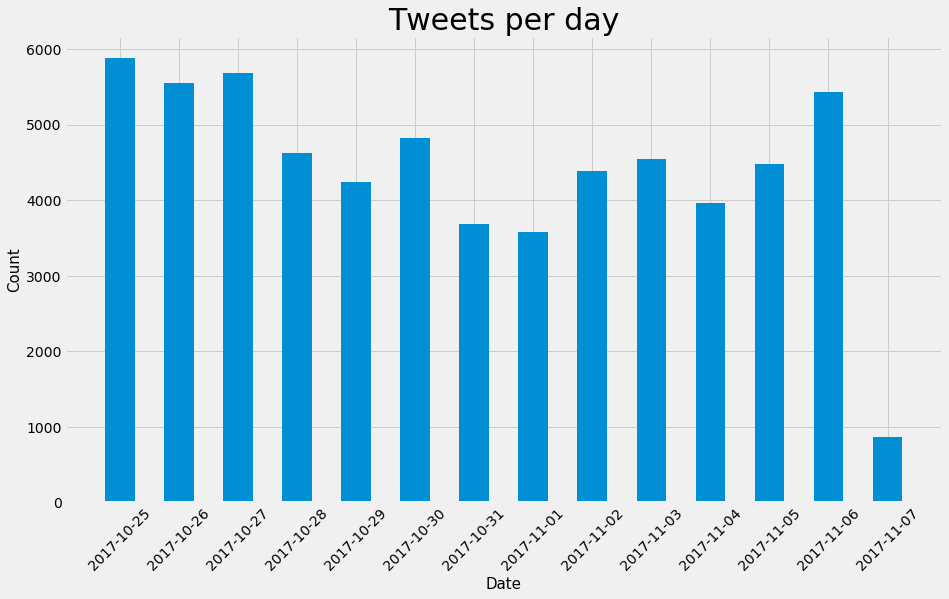

In [29]:
labels = tweets_per_day_df.index.values
ind = np.arange(len(labels))
width = 0.5

count = tweets_per_day_df
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize = (14, 8))
ax1 = fig.add_subplot(111)
ax1.set_title('Tweets per day', fontsize = 30)
ax1.set_xlabel('Date', fontsize = 15)
ax1.set_ylabel('Count', fontsize = 15)
ax1.bar(ind, count, width)
ax1.set_xticks(ind)
plt.xticks(rotation = 45)

ax1.set_xticklabels(labels);

#### Make a column for hashtags

In [30]:
df2 = df1.copy()

In [31]:
df2['hashtags'] = df2['tweets_clean1'].str.findall(r'#.*?(?=\s|$)')

In [32]:
df2['Number of hashtags'] = df2['hashtags'].apply(lambda x: len(x))

In [33]:
df2['Number of hashtags'].sum()

16464

In [34]:
df2['Number of hashtags'].describe()

count    61711.000000
mean         0.266792
std          0.745358
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.000000
Name: Number of hashtags, dtype: float64

In [35]:
mask = df2['hashtags'].astype(str) == '[]'
df2.loc[mask, 'hashtags'] = np.nan

In [36]:
hashtags = [df2['hashtags'].values.reshape(-1,).tolist()]

In [37]:
import itertools
unnested = list(itertools.chain(*hashtags))
unnested = [x for x in unnested if str(x) != 'nan']
unnested = list(itertools.chain(*unnested))

In [38]:
hashtags_series = pd.Series(unnested)
hashtags_list = hashtags_series.value_counts().index.tolist()
num_hashtags = hashtags_series.value_counts().tolist()
hashtag_df = pd.DataFrame({'Hashtag': hashtags_list, 'Count': num_hashtags})

In [39]:
hashtag_df['Hashtag'][:10].values

array(['#travel', '#avgeek', '#americanairlines', '#ua747farewell',
       '#fail', '#customerservice', '#united', '#unitedairlines',
       '#airlines', '#southwest'], dtype=object)

In [40]:
names = hashtag_df['Hashtag'][:10].values
names

array(['#travel', '#avgeek', '#americanairlines', '#ua747farewell',
       '#fail', '#customerservice', '#united', '#unitedairlines',
       '#airlines', '#southwest'], dtype=object)

In [41]:
hashtag_df = hashtag_df.set_index('Hashtag')

In [42]:
def get_count_of_hashtags(hashtags):
    '''
    input: hashtags (list) of hashtags
    output: (list) of the count of hashtags    
    '''
    number = []
    for hashtag in hashtags:
        number.append(hashtag_df.loc[hashtag, 'Count'])
    return number

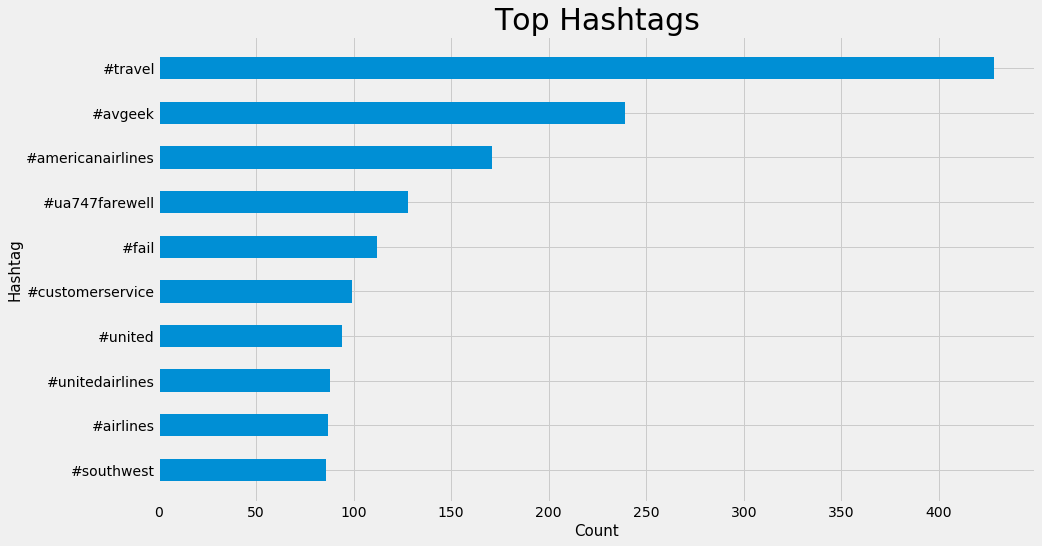

In [43]:
labels = list(hashtag_df.index[:10].values)
ind = np.arange(len(labels))
width = 0.5

count = get_count_of_hashtags(names)
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize = (14, 8))
ax1 = fig.add_subplot(111)
ax1.set_title('Top Hashtags', fontsize = 30)
ax1.set_xlabel('Count', fontsize = 15)
ax1.set_ylabel('Hashtag', fontsize = 15)
ax1.barh(ind, count, width)
ax1.set_yticks(ind)
ax1.set_yticklabels(labels)
plt.gca().invert_yaxis();

#### I didn't do anything to incorporate hashtags into my final analysis. The most common ones were generic. There were a lot of unique hashtags that wouldn't be picked up in the analysis.

In [44]:
df2.to_pickle('../pickle_files/df2.p')